In [ ]:
"""
This code implement RL using Neural Networks and TensorFlow
Source 
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
"""

In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Loading the environment
env = gym.make('FrozenLake-v0')

In [3]:
# Initializing the TF-Graph
tf.reset_default_graph()

In [4]:
# Setup the Feed-forward NN
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

In [5]:
# Compute the loss and setup training
nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [18]:
# Training the model

# Initialize the network
init = tf.initialize_all_variables()

# Set learning parameters
g = 0.99
e = 0.1
n = 2000
rList = [] # Total rewards
jList = [] # Steps per episode

writer = tf.summary.FileWriter('/tmp/tensorflow', graph=tf.get_default_graph())

with tf.Session() as sess:
    sess.run(init)
    for i in range(n):
        # Reset the environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        tf.summary.scalar('reward', rAll)
        tf.summary.scalar('j', j)
        
        # The Q-Network
        while j < 99:
            j += 1
            # Choose an action by greedily from the Q-network
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            
            # Get new state and reward from environment
            s1, r, d, _ = env.step(a[0])
            
            # Obtain the Q values by feeding the new state through the network
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            
            # Obtain maxQ and their target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + g * maxQ1
            
            # Train network using target and predicted Q
            _, W1 = sess.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
            writer.add_summary(summary, n)
            if d == True:
                # Reduce chance of random action as the network is trained
                e = 1./((i/50) + 10)
                break
            jList.append(j)
            rList.append(rAll)
            print "Percent of succesful episodes: " + str(sum(rList)/n) + "%"

NameError: name 'summary_op' is not defined

In [9]:
plt.plot(rList)

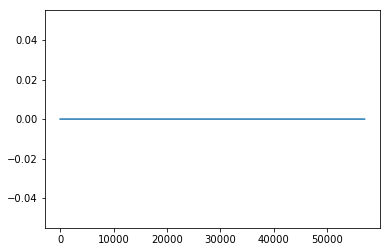

In [10]:
plt.show()

In [11]:
plt.plot(jList)

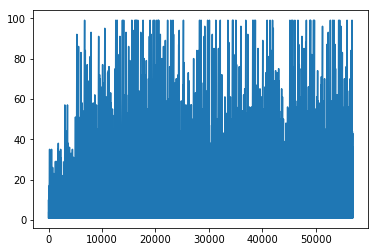

In [12]:
plt.show()